In [1]:
#Delhi Network Analysis

In [2]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import folium as fo

In [3]:
# Read File
file=pd.read_csv(r'D:\PYTHON FOR DATA SCIENCE UDEMY COURSE MATERIALS\Projects\Delhi Network Analysis\Delhi-Metro-Network.csv')
file

,Station ID,Station Name,Distance from Start (km),Line,Opening Date,Station Layout,Latitude,Longitude
0,1,Jhil Mil,10.3,Red line,2008-04-06,Elevated,28.675790,77.312390
1,2,Welcome [Conn: Red],46.8,Pink line,2018-10-31,Elevated,28.671800,77.277560
2,3,DLF Phase 3,10.0,Rapid Metro,2013-11-14,Elevated,28.493600,77.093500
3,4,Okhla NSIC,23.8,Magenta line,2017-12-25,Elevated,28.554483,77.264849
4,5,Dwarka Mor,10.2,Blue line,2005-12-30,Elevated,28.619320,77.033260
...,...,...,...,...,...,...,...,...
280,281,Bata Chowk,38.3,Voilet line,2015-06-09,Elevated,28.385836,77.313462
281,282,Dwarka Sector 12,5.8,Blue line,2006-01-04,Elevated,28.592320,77.040510
282,283,Noida Sector 18,43.6,Blue line,2009-12-11,Elevated,28.570810,77.326120
283,284,Knowledge Park II,21.4,Aqua line,2019-01-25,Elevated,28.456867,77.500054


In [4]:
# Check for Missing Data
missingValues=file.isnull().sum()
missingValues

Station ID                  0
Station Name                0
Distance from Start (km)    0
Line                        0
Opening Date                0
Station Layout              0
Latitude                    0
Longitude                   0
dtype: int64

In [5]:
# Checking Data Types
dataTypes=file.dtypes
dataTypes

Station ID                    int64
Station Name                 object
Distance from Start (km)    float64
Line                         object
Opening Date                 object
Station Layout               object
Latitude                    float64
Longitude                   float64
dtype: object

In [6]:
#converting 'Opening Date' to datetime format and slice it to Year,Month,Day
slicingOpeningDate=file['Opening Date']
convertingOpeningDate=pd.to_datetime(slicingOpeningDate)
file['Opening Date'] = pd.to_datetime(file['Opening Date'])
file['Day']   =file['Opening Date'].dt.day
file['Month'] =file['Opening Date'].dt.month
file['Year']  =file['Opening Date'].dt.year

In [7]:
# counting the number of stations opened each year
no_Stations_Per_Year=file[['Year','Station Name']].groupby('Year').count()
no_Stations_Per_Year

,Station Name
Year,
2002,6
2003,4
2004,11
2005,28
2006,9
2008,3
2009,17
2010,54
2011,13


Text(0.5, 1.0, 'No. of Station Per Year')

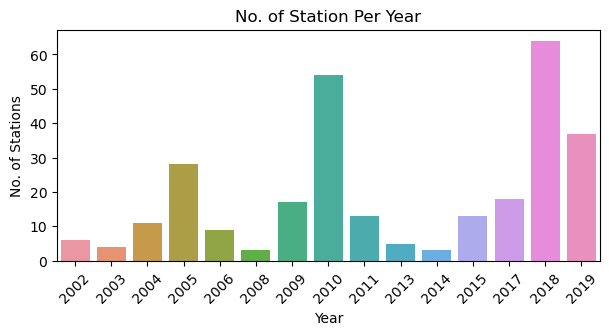

In [8]:
#Plot the counting the number of stations opened each year
plt.figure(figsize=(7,3))
sns.barplot(x=no_Stations_Per_Year.index, y=no_Stations_Per_Year['Station Name'])
plt.ylabel('No. of Stations')
plt.xticks(rotation=45)
plt.title('No. of Station Per Year')

In [9]:
# analyze No. of Stations in each line & Max Distance Per Line & Average Distance bet Station Per Line in Same Figure

In [10]:
# analyze No. of Stations in each line
line_stations_no=file[['Line','Station Name']].groupby('Line').count()
line_stations_no

,Station Name
Line,
Aqua line,21
Blue line,49
Blue line branch,8
Gray line,3
Green line,21
Green line branch,3
Magenta line,25
Orange line,6
Pink line,38


In [11]:
# Max Distance Per Line
line_max_distance=file[['Line','Distance from Start (km)']].groupby('Line').max().sort_values(by='Distance from Start (km)', ascending=False)
line_max_distance

,Distance from Start (km)
Line,
Blue line,52.7
Pink line,52.6
Yellow line,45.7
Voilet line,43.5
Magenta line,33.1
Red line,32.7
Aqua line,27.1
Green line,24.8
Orange line,20.8


In [12]:
#Average Distance bet Station in each Line
avg_distance_bet_stations_per_line=line_max_distance/(line_stations_no.values - 1)
avg_distance_bet_stations_per_line

,Distance from Start (km)
Line,
Blue line,2.635000
Pink line,1.095833
Yellow line,6.528571
Voilet line,21.750000
Magenta line,1.655000
Red line,16.350000
Aqua line,1.129167
Green line,4.960000
Orange line,0.562162


Text(0.5, 1.0, 'Avg Distance bet Stations Per Line')

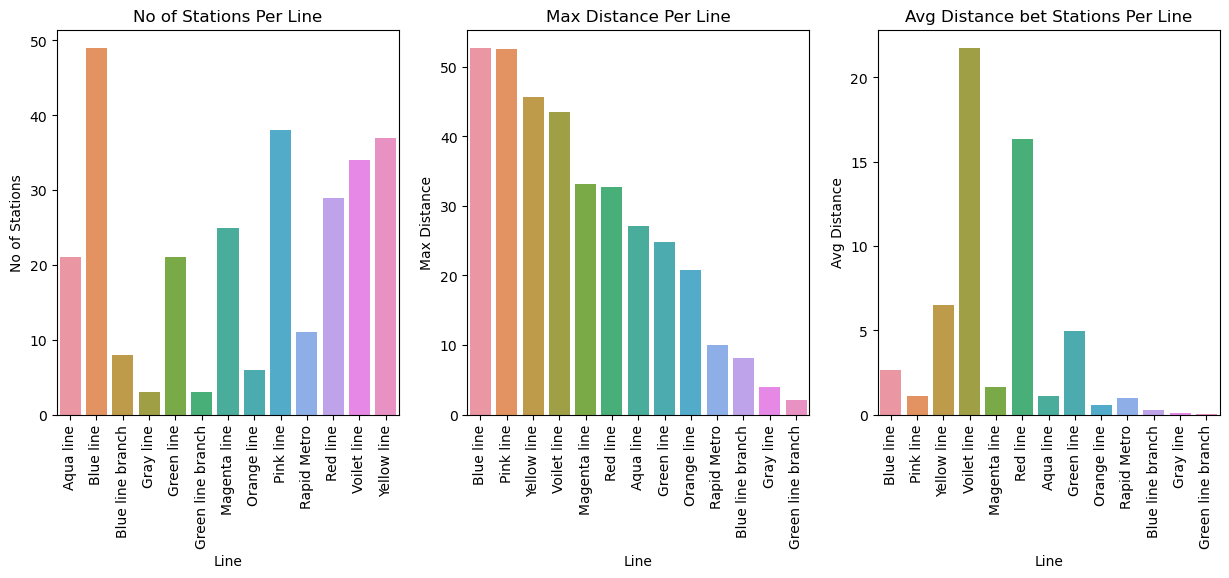

In [13]:
#Plot all Tables in Same Figure
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot(x=line_stations_no.index, y=line_stations_no['Station Name'])
plt.xticks(rotation=90)
plt.ylabel('No of Stations')
plt.title('No of Stations Per Line')

plt.subplot(1,3,2)
sns.barplot(x=line_max_distance.index, y=line_max_distance['Distance from Start (km)'])
plt.xticks(rotation=90)
plt.ylabel("Max Distance")
plt.title('Max Distance Per Line')

plt.subplot(1,3,3)
sns.barplot(x=avg_distance_bet_stations_per_line.index, y=avg_distance_bet_stations_per_line['Distance from Start (km)'])
plt.xticks(rotation=90)
plt.ylabel("Avg Distance")
plt.title('Avg Distance bet Stations Per Line')

In [14]:
# analyze the distribution of layouts((Elevated, Ground Level, Underground)) across the network 

In [15]:
distribution_of_layouts=file[['Station Layout','Station Name']].groupby('Station Layout').count().sort_values(by='Station Name',  ascending=False)
distribution_of_layouts

,Station Name
Station Layout,
Elevated,214
Underground,68
At-Grade,3


Text(0.5, 0, 'No. of Layouts')

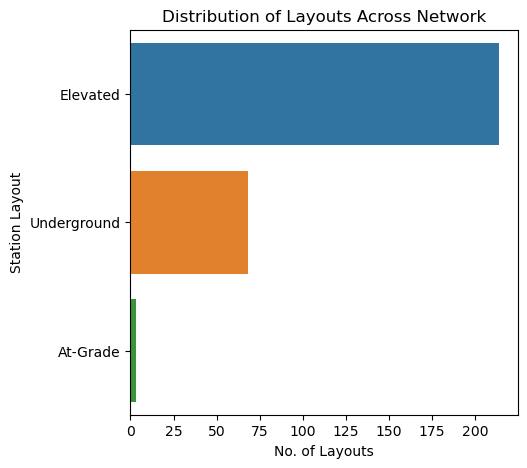

In [16]:
plt.figure(figsize=(5,5))
sns.barplot(x=distribution_of_layouts['Station Name'], y=distribution_of_layouts.index , orient='h')
plt.title('Distribution of Layouts Across Network')
plt.xlabel('No. of Layouts')

In [61]:
#plot the Stations on Map
avg_Latitude=sum(file['Latitude'])/len(file['Latitude'])
avg_Longitude=sum(file['Longitude'])/len(file['Longitude'])
map=fo.Map(location=[avg_Latitude,avg_Longitude], zoom_start=11.5)
stations = file['Station Name']
points=file[['Latitude','Longitude']]
for (point,station) in zip(points.values,stations):
          fo.Marker(point, tooltip=station).add_to(map)

In [62]:
map